# Importing Frontier and dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/neilnatarajan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from selectionpossibilityfrontier import return_frontier, plot_frontier, make_proportional_targets

# Testing Frontier

First, we generate some dummy data.

In [3]:
# Create some Dummy data to use in our testing
total_size = 2000
select_size = 500
proportion_female = 0.5
proportion_white = 0.8
proportion_low_ses = 0.4

In [4]:
female = (np.random.rand(total_size) < proportion_female).astype(int)
male = 1 - female

white = (np.random.rand(total_size) < proportion_white).astype(int)
bipoc = 1 - white

low_ses = (np.random.rand(total_size) < proportion_low_ses).astype(int)

score = np.random.rand(total_size)

In [5]:
user_level = pd.DataFrame([male, female, white, bipoc, low_ses, score]).transpose()
user_level.columns = ['Male', 'Female', 'White', 'BIPOC', 'Low_SES', 'Score']

In [6]:
categories = user_level.drop('Score', axis=1).values.astype(float)
scores = user_level['Score'].values.astype(float)

weights = np.ones(categories.shape[1])
proportions = np.array([.5, .5, 0.0, .4, .8])

Then, we use SPF functionality to plot a frontier

In [7]:
divfunc, dfmax = make_proportional_targets(select_size, proportions, weights)

In [8]:
ds, ps, cs = return_frontier(categories, scores, select_size, divfunc, dfmax, ext=True, verbose=True)

Beginning Frontier Plotting
Completed step 1 of 20 | sratio: 0.00 | diversity score: 1.00 | performance score: 0.51
Completed step 2 of 20 | sratio: 0.05 | diversity score: 1.00 | performance score: 0.75
Completed step 3 of 20 | sratio: 0.11 | diversity score: 1.00 | performance score: 0.75
Completed step 4 of 20 | sratio: 0.16 | diversity score: 1.00 | performance score: 0.75
Completed step 5 of 20 | sratio: 0.21 | diversity score: 1.00 | performance score: 0.75
Completed step 6 of 20 | sratio: 0.26 | diversity score: 1.00 | performance score: 0.77
Completed step 7 of 20 | sratio: 0.32 | diversity score: 1.00 | performance score: 0.78
Completed step 8 of 20 | sratio: 0.37 | diversity score: 0.99 | performance score: 0.80
Completed step 9 of 20 | sratio: 0.42 | diversity score: 0.98 | performance score: 0.81
Completed step 10 of 20 | sratio: 0.47 | diversity score: 0.97 | performance score: 0.83
Completed step 11 of 20 | sratio: 0.53 | diversity score: 0.96 | performance score: 0.84
Co

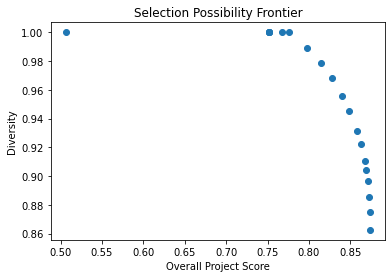

In [9]:
plot_frontier(ds, ps, qlabel='Overall Project Score', lims=False)